In [2]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import datasets
from sklearn.utils import Bunch

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import keras as kr
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
from keras import models, layers

Using TensorFlow backend.


## Notebook using 13 variables to predict MEDV value

In [3]:
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']
medv = df['MEDV'].copy()
del df['MEDV']
df = pd.concat((medv, df), axis=1)

In [15]:
#https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/

inputs = df.loc[:, df.columns != 'MEDV']
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
outputs = df[['MEDV']]
outputs

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [17]:
x_train, x_test, y_train, y_test = mod.train_test_split(inputs, outputs, test_size=0.4)

In [20]:
# Applies a scale to both the inputs train and test sets defined in the previous cell
scaler = pre.StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Prints the scaled inputs trained values to ensure they are calculating correctly
print(x_train_scaled[0])

[-0.21027988 -0.50687607  1.29044027 -0.29329423  0.44505882 -0.61031863
  0.38699108 -0.67005745 -0.49231417  0.03385739 -1.64289457 -1.41479062
 -0.04856426]


In [68]:
# Creates the neural network and builds the appropriate layers
model = models.Sequential()

# Hidden layer with 13 neurons and an input layer 13
model.add(layers.Dense(13, activation='relu', input_dim=13))
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(26, activation='relu'))
# Single output layer for MEDV prediction
model.add(layers.Dense(1))

# RMSprop optimizer increases learning rate of the neural network
# MAE includes the mean_absolute error in the metrics for later evaluation
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error', 'acc'])

In [128]:
# Trains the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 0s 33us/step - loss: 1.9354 - mean_absolute_error: 0.9503 - acc: 0.0372 - val_loss: 14.7003 - val_mean_absolute_error: 2.6099 - val_acc: 0.0492
Epoch 2/100
242/242 [==============================] - 0s 29us/step - loss: 1.8956 - mean_absolute_error: 0.9843 - acc: 0.0372 - val_loss: 15.6277 - val_mean_absolute_error: 2.6451 - val_acc: 0.0328
Epoch 3/100
242/242 [==============================] - 0s 29us/step - loss: 1.9796 - mean_absolute_error: 0.9945 - acc: 0.0455 - val_loss: 16.5626 - val_mean_absolute_error: 2.7527 - val_acc: 0.0164
Epoch 4/100
242/242 [==============================] - 0s 37us/step - loss: 1.9689 - mean_absolute_error: 0.9881 - acc: 0.0455 - val_loss: 15.9677 - val_mean_absolute_error: 2.6918 - val_acc: 0.0328
Epoch 5/100
242/242 [==============================] - 0s 37us/step - loss: 1.9552 - mean_absolute_error: 0.9788 - acc: 0.0372 - val_loss: 15.9794 - val_mean_a

In [129]:
# Evaluates the Mean Squared Error, Mean Absolute Error and Accuracy metric values
model.evaluate(x_test_scaled, y_test)

203/203 [==============================] - 0s 15us/step


[18.035633566344313, 2.803542288653369, 0.009852216748768473]

In [130]:
# Selects the first 2 values from the training data to make a prediction
to_predict = x_train_scaled[:2]
predictions = model.predict(to_predict)
# Prints the predicted values
print(predictions)

[[23.361864]
 [37.43979 ]]


In [131]:
# Prints the actual values from the first 2 values from the MEDV training output set for comparison
print(y_train[:2])

     MEDV
167  23.8
304  36.1


In [132]:
# https://keras.io/visualization/
from keras.utils import plot_model

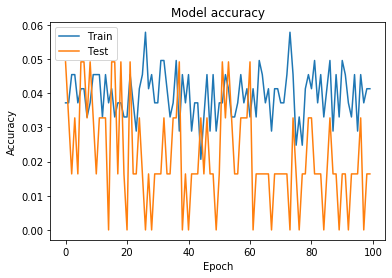

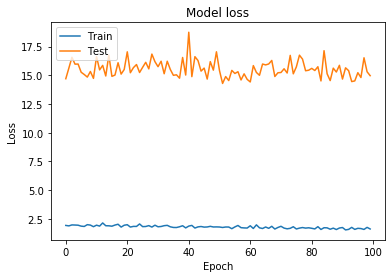

In [133]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [134]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])
